In [ ]:
# Input data:
# https://archive.ics.uci.edu/dataset/125/insurance+company+benchmark+coil+2000

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import regularizers

In [2]:
train = pd.read_csv('insurance+company+benchmark+coil+2000/ticdata2000.txt', sep="\t", header=None)
test = pd.read_csv('insurance+company+benchmark+coil+2000/ticeval2000.txt',sep="\t", header=None)
target = pd.read_csv('insurance+company+benchmark+coil+2000/tictgts2000.txt', header=None)
col = pd.read_csv('insurance+company+benchmark+coil+2000/dictionary.txt', sep= "\t", encoding='ISO-8859-1')

In [3]:
target.columns = ["target"]

In [4]:
name_data = []
for row in col['DATA DICTIONARY'][1:]:  
    parts = row.split()  
    if len(parts) > 1:  
        name_data.append(parts[1])

In [5]:
train_col_names= name_data[:86]
train.columns = train_col_names

In [6]:
test_col_names= name_data[:85]
test.columns = test_col_names

In [7]:
# test.info()
# train.info()
# There are no null values in the train and test data

In [8]:
train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [9]:
# Define the input and target variable 
X = train.drop('CARAVAN', axis=1)  # Drop the target column 'CARAVAN'
y = train['CARAVAN']  # Target column


In [10]:
# Encode the target labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


In [11]:
# Build the Deep Neural Network Model using Keras
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Add second hidden layer
model.add(Dense(64, activation='relu'))

# Add third hidden layer
model.add(Dense(32, activation='relu'))

# Add output layer (Sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid')) 


/Users/bhavitha/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9273 - loss: 0.2948 - val_accuracy: 0.9305 - val_loss: 0.2422
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9383 - loss: 0.1967 - val_accuracy: 0.9305 - val_loss: 0.2462
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9375 - loss: 0.1824 - val_accuracy: 0.9305 - val_loss: 0.2517
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9421 - loss: 0.1657 - val_accuracy: 0.9253 - val_loss: 0.2483
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9467 - loss: 0.1512 - val_accuracy: 0.9262 - val_loss: 0.2667
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9545 - loss: 0.1394 - val_accuracy: 0.9219 - val_loss: 0.2709
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9490 - loss: 0.1299 - val_accuracy: 0.9227 - val_loss: 0.2687
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9572 - loss: 0

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,133 (250.52 KB)

 Trainable params: 21,377 (83.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,756 (167.02 KB)

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred = (model.predict(X_valid) > 0.5).astype("int32")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9050 - loss: 1.0117
Test Accuracy: 0.9056
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


#### Build the DNN Model using the Functional API

In [15]:
# Input layer
inputs = Input(shape=(X_train.shape[1],))

# First hidden layer
x = Dense(128, activation='relu')(inputs)

# Second hidden layer
x = Dense(64, activation='relu')(x)

# Third hidden layer
x = Dense(32, activation='relu')(x)

In [16]:
# Output layer (sigmoid for binary classification)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model_2 = Model(inputs=inputs, outputs=outputs)

In [17]:
# Compile the model
model_2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [18]:
model_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 85)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,377 (83.50 KB)

 Trainable params: 21,377 (83.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model_2.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

# Evaluate the model
loss, accuracy = model_2.evaluate(X_valid, y_valid)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8663 - loss: 0.3393 - val_accuracy: 0.9305 - val_loss: 0.2427
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9404 - loss: 0.2006 - val_accuracy: 0.9305 - val_loss: 0.2427
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9472 - loss: 0.1679 - val_accuracy: 0.9296 - val_loss: 0.2362
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9441 - loss: 0.1668 - val_accuracy: 0.9288 - val_loss: 0.2456
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9469 - loss: 0.1571 - val_accuracy: 0.9262 - val_loss: 0.2483
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9476 - loss: 0.1503 - val_accuracy: 0.9288 - val_loss: 0.2586
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9552 - loss: 0.1216 - val_accuracy: 0.9279 - val_loss: 0.2578
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9550 - loss: 0

In [20]:
# Predict on the test set
y_pred = (model.predict(X_valid) > 0.5).astype("int32")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


### Adding regularization to the model

In [21]:
# Functional API Model with L1 Regularization
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Add layers with L1 regularization
x = Dense(128, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(inputs)

x = Dense(64, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(x)

x = Dense(32, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(x)

# Add the output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the model by specifying inputs and outputs
model_l1 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_l1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_l1 = model_l1.fit(X_train, y_train, 
                           epochs=200, 
                           batch_size=32, 
                           validation_data=(X_valid, y_valid))

# Evaluate the model after training
loss_l1, accuracy_l1 = model_l1.evaluate(X_valid, y_valid)
print(f"L1 Regularization Test Accuracy: {accuracy_l1:.4f}")


Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.9333 - loss: 13.3945 - val_accuracy: 0.9305 - val_loss: 1.6418
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9350 - loss: 0.9252 - val_accuracy: 0.9305 - val_loss: 0.3637
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9403 - loss: 0.3184 - val_accuracy: 0.9305 - val_loss: 0.3114
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9409 - loss: 0.2744 - val_accuracy: 0.9305 - val_loss: 0.2921
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9431 - loss: 0.2522 - val_accuracy: 0.9305 - val_loss: 0.2852
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9413 - loss: 0.2506 - val_accuracy: 0.9305 - val_loss: 0.2808
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9437 - loss: 0.2411 - val_accuracy: 0.9305 - val_loss: 0.2813
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9452 - loss: 

In [22]:
# Functional API Model with L2 Regularization
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Add layers with L2 regularization
x = Dense(128, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01))(inputs)

x = Dense(64, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01))(x)  

x = Dense(32, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01))(x)  

# Add the output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the model by specifying inputs and outputs
model_l2 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_l2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_l2 = model_l2.fit(X_train, y_train, 
                           epochs=200, 
                           batch_size=32, 
                           validation_data=(X_valid, y_valid))

# Evaluate the model after training
loss_l2, accuracy_l2 = model_l2.evaluate(X_valid, y_valid)
print(f"L2 Regularization Test Accuracy: {accuracy_l2:.4f}")


Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.9447 - loss: 1.9348 - val_accuracy: 0.9305 - val_loss: 0.7274
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9454 - loss: 0.5520 - val_accuracy: 0.9305 - val_loss: 0.3756
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9439 - loss: 0.3042 - val_accuracy: 0.9305 - val_loss: 0.2930
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9369 - loss: 0.2538 - val_accuracy: 0.9305 - val_loss: 0.2688
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9436 - loss: 0.2238 - val_accuracy: 0.9305 - val_loss: 0.2566
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9441 - loss: 0.2139 - val_accuracy: 0.9305 - val_loss: 0.2556
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9400 - loss: 0.2222 - val_accuracy: 0.9305 - val_loss: 0.2499
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9465 - loss: 0

In [23]:
# Adding Regularization improved the model accuracy

### Implementing on the entire dataset

In [24]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare the test dataset and scale it
X_test_scaled = scaler.transform(test)

# Prepare the input for the model
inputs_final = Input(shape=(X_scaled.shape[1],))

# Add layers with L1 regularization
x = Dense(128, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(inputs_final) 
x = Dense(64, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(x)
x = Dense(32, activation='relu', 
          kernel_regularizer=regularizers.l1(0.01))(x)

# Add the output layer
outputs_final = Dense(1, activation='sigmoid')(x)

# Create the model by specifying inputs and outputs
model_final = Model(inputs=inputs_final, outputs=outputs_final)

# Compile the model
model_final.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the entire dataset
history_3 = model_final.fit(X_scaled, y, epochs=100, batch_size=32, validation_split = 0.2)

# Make predictions on the test dataset
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)

# Compare with actual target values
actual_targets = target['target'].values 

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9004 - loss: 13.4885 - val_accuracy: 0.9339 - val_loss: 1.7767
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9440 - loss: 0.9963 - val_accuracy: 0.9339 - val_loss: 0.3583
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9396 - loss: 0.3198 - val_accuracy: 0.9339 - val_loss: 0.2934
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9470 - loss: 0.2531 - val_accuracy: 0.9339 - val_loss: 0.2764
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9433 - loss: 0.2484 - val_accuracy: 0.9339 - val_loss: 0.2698
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9419 - loss: 0.2469 - val_accuracy: 0.9339 - val_loss: 0.2686
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9374 - loss: 0.2588 - val_accuracy: 0.9339 - val_loss: 0.2685
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9359 - loss: 0.

In [25]:
# Calculate accuracy
accuracy = (predictions_binary.flatten() == actual_targets).mean()
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.9155


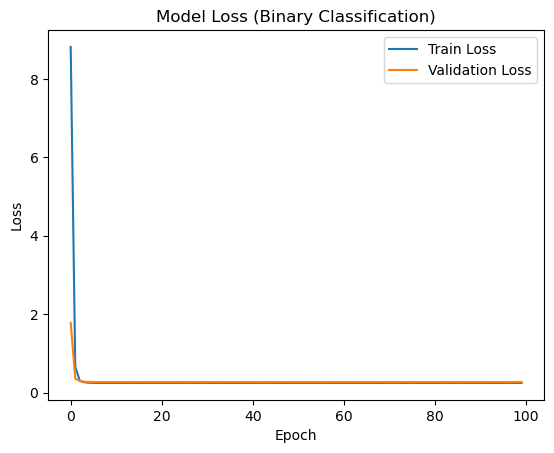

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Binary Classification)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### Observations:
#### The accuracy has been improved from 90 to 93 by adding regularization technique to the model. 
#### Both L1 and L2 showed same result here.
#### The train and validation loss decreased initially and remained constant afterward. 